In [1]:
%matplotlib inline
import IPython
import pylab

import matplotlib.pyplot as plt
import numpy as np
import pylab as py
import scipy as sp

import scipy.signal

from elasticsearch import Elasticsearch
from elasticsearch_dsl import Search, Q
from datetime import datetime

pylab.rcParams['figure.figsize'] = (16, 4)

In [2]:
client = Elasticsearch()

In [3]:
def hist_data(terms=None):
    q = Search(using=client, index='records-hep')[0:0]
    if terms:
        q = q.query('match', abstract=terms)
    start_date = datetime(1950, 1, 1, 0, 0, 0)
    q = q.filter('range', earliest_date={'gte': '1960-01-01'})
    q.aggs.bucket(
        'group_by_date', 
        'date_histogram', 
        field='earliest_date', 
        interval='day', 
        format='date_optional_time'
    )
    return q.execute().aggregations.group_by_date.buckets

In [4]:
def unzip(data):
    return zip(*[(datetime.strptime(e.key_as_string, "%Y-%m-%dT%H:%M:%S.%fZ"), e.doc_count) for e in data])

In [5]:
hist_general = hist_data()

In [6]:
x, y = unzip(hist_general)

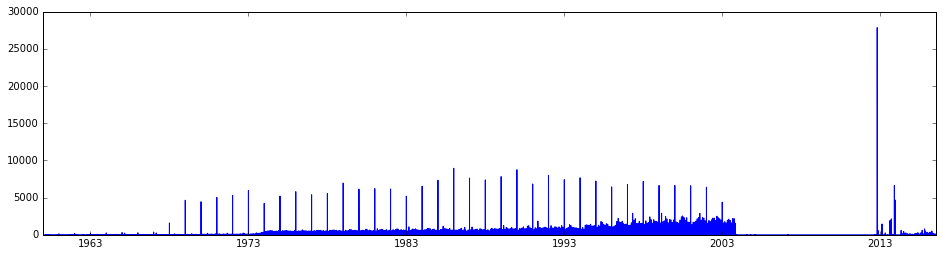

In [7]:
plt.plot(x, y)

In [8]:
np.mean(y)

33.155027121270827

In [9]:
fft_general = np.fft.rfft(y)

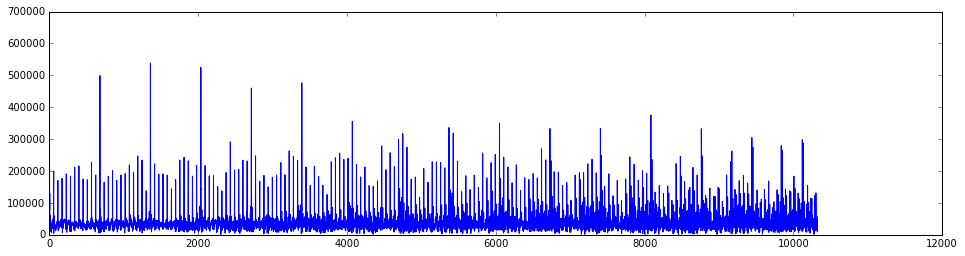

In [10]:
plt.plot(np.abs(fft_general))

In [17]:
fL = 0.001
N = 200
h = np.sinc(2 * fL * (np.arange(N) - (N - 1) / 2.))
h *= np.blackman(N)
h /= np.sum(h)

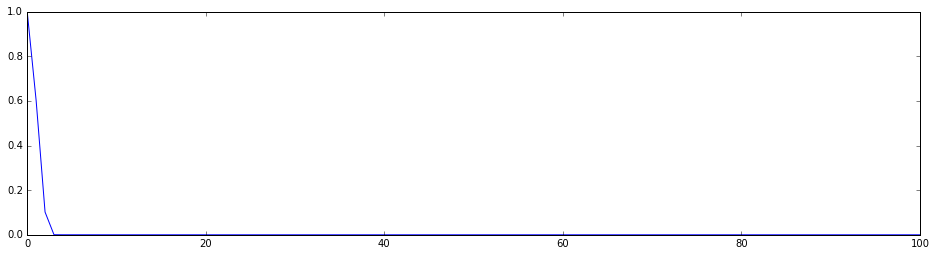

In [18]:
plt.plot(np.abs(np.fft.rfft(h)))

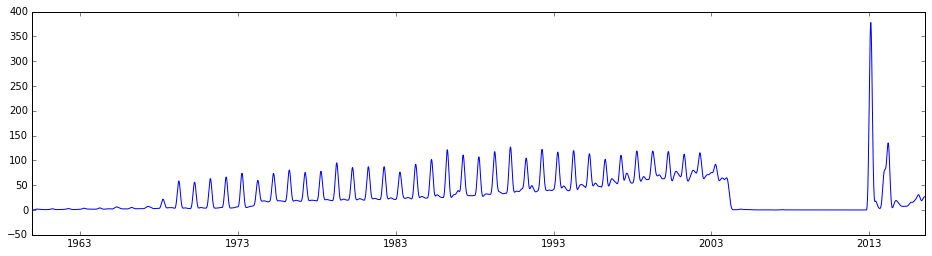

In [19]:
plt.plot(x, sp.signal.lfilter(h, 1.0, y))